# PySP开发测试区

## 0. 测试准备

### 0.1 测试环境导入

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

### 0.2 测试数据生成

In [2]:
import numpy as np
fs = 1000.0
t = np.arange(0, 5, 1/fs)

# 多个谐波分量
harmonics = (
    2 * np.sin(2 * np.pi * 50 * t) +      # 50Hz
    1.5 * np.sin(2 * np.pi * 120 * t) +   # 120Hz
    np.sin(2 * np.pi * 250 * t)           # 250Hz
)

# 冲击序列
impulse = np.zeros_like(t)
impulse_indices = [200, 500, 700]
impulse[impulse_indices] = [5, -4, 6]

# 随机噪声冲击
random_impulse = np.zeros_like(t)
random_indices = np.random.choice(len(t), 5, replace=False)
random_impulse[random_indices] = np.random.uniform(-3, 3, size=5)

# 白噪声
white_noise = np.random.normal(0, 0.5, size=len(t))

# 合成信号
Data = harmonics + impulse + random_impulse + white_noise


## 1. Signal模块测试

### 1.1 Signal.Axis()

In [3]:
# --------------------------------------------------------------------------------------------#
# 测试接口
from PySP.Signal import Axis,t_Axis,f_Axis

# --------------------------------------------------------------------------------------------#
# 辅助接口


# --------------------------------------------------------------------------------------------#
# 测试过程

axis= Axis(N=10000,dx=0.1,x0=1.0,name="x",unit='u')
t_axis= t_Axis(len(axis),fs=1000.0)

print(axis)
print(t_axis)

Axis(x=[1.0000e+00 1.1000e+00 1.2000e+00 ... 1.0007e+03 1.0008e+03 1.0009e+03]u)
t_Axis(时间=[0.000e+00 1.000e-03 2.000e-03 ... 9.997e+00 9.998e+00 9.999e+00]s)


### 1.2 Signal.Series()

Series[测试信号](位移=[ 0.175465    3.20783081  2.70408257 ... -1.89960893 -2.74009222
 -2.41454014]μm, t_Axis(时间=[0.000e+00 1.000e-03 2.000e-03 ... 4.997e+00 4.998e+00 4.999e+00]s))


f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Signal_Module\core.py:604: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(<Figure size 900x400 with 1 Axes>,
 array([<AxesSubplot:xlabel='时间/s', ylabel='位移/μm'>], dtype=object))

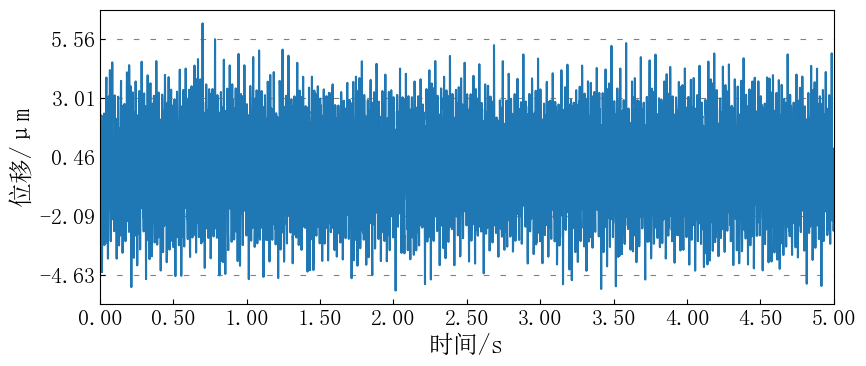

In [4]:
# --------------------------------------------------------------------------------------------#
# 测试接口
from PySP.Signal import Series

# --------------------------------------------------------------------------------------------#
# 辅助接口
from PySP.Signal import t_Axis

# --------------------------------------------------------------------------------------------#
# 测试过程

S = Series(
    axis=t_Axis(len(Data), fs=fs), data=Data, name="位移", unit="μm", label="测试信号"
)
print(S)
S.plot()

### 1.1 Signal.Signal()

Signal[测试信号](位移=[ 0.175465    3.20783081  2.70408257 ... -1.89960893 -2.74009222
 -2.41454014]μm, t_Axis(时间=[0.000e+00 1.000e-03 2.000e-03 ... 4.997e+00 4.998e+00 4.999e+00]s))


f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Plot_Module\LinePlot.py:134: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


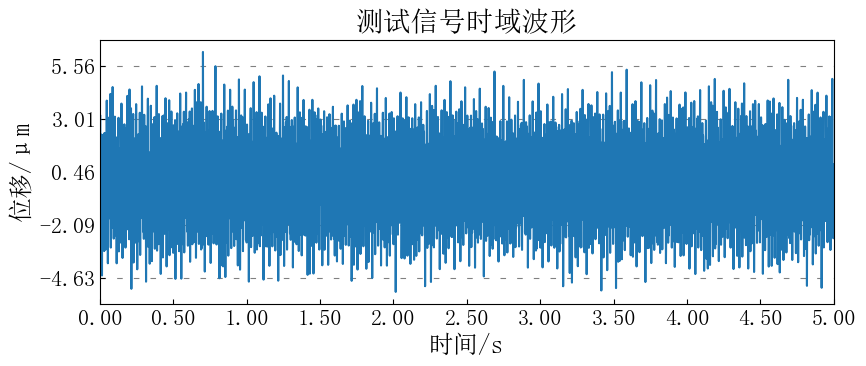

In [5]:
# --------------------------------------------------------------------------------------------#
# 测试接口
from PySP.Signal import Signal
# --------------------------------------------------------------------------------------------#
# 辅助接口
from PySP.Signal import t_Axis
# --------------------------------------------------------------------------------------------#
# 测试过程

Sig = Signal(
    axis=t_Axis(len(Data), fs=fs), data=Data, name="位移", unit="μm", label="测试信号"
)
print(Sig)
Sig.plot()

### 1.4 Signal.Spectra()

Spectra[测试信号](幅值=[7.79490141e-13 2.69952447e-12 8.13155019e-13 ... 2.00466389e-12
 1.51049999e-12 2.63148410e-14]μm, f_Axis(频率=[0.000e+00 1.000e+00 2.000e+00 ... 2.498e+03 2.499e+03 2.500e+03]Hz))


f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Plot_Module\LinePlot.py:152: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


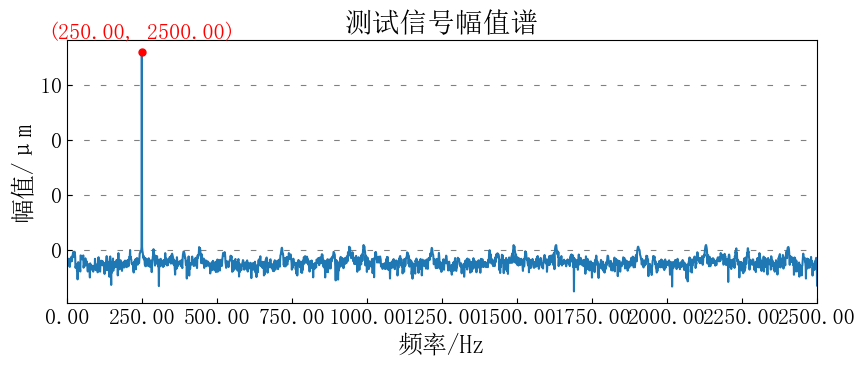

In [9]:
# --------------------------------------------------------------------------------------------#
# 测试接口
from PySP.Signal import Spectra

# --------------------------------------------------------------------------------------------#
# 辅助接口
from PySP.Signal import f_Axis

# --------------------------------------------------------------------------------------------#
# 测试过程
_Data=np.abs(np.fft.rfft(np.sin(2*np.pi*50*t)))
Spc = Spectra(
    axis=f_Axis(len(_Data), df=1.0), data=_Data, name="幅值", unit="μm", label="测试信号"
)
print(Spc)
Spc.plot()

### 1.2 Signal.Resample()

Signal[](位移=[ 0.59246526  3.18174063 -0.45382503  2.18005579 -0.91115576  2.3361302
 -3.14089513  0.40146471 -4.6607311   0.60460636 -0.39715906  1.2967895
 -1.11974446  3.25804624 -1.07986837  3.05085676 -3.22600842 -0.38231634
 -1.95861381  0.50337923 -2.46099025  2.43523126  1.29190691  4.06442454
 -0.69752223  0.23579246 -1.42719483  0.67456638 -4.33632269 -1.86645422
 -0.85469667  2.66725657  0.24683515  1.10707511  0.21645713  2.79505477
 -3.25627903 -1.7516797  -2.12878045  2.02268618 -1.28101694  0.46642917
  0.43274067  4.78724348 -0.97363681  1.51979654 -2.59360346  0.07795315
 -2.41932776 -1.2538031  -2.14875488  3.29784198  0.06356292  2.77375716
 -1.26907478  1.68414925 -3.00159646  0.09987835 -5.29692673 -0.04517894
 -0.55518232  0.79282889 -0.93671818  2.61719356 -2.18481992  2.7638815
 -4.4608272  -0.55287043 -1.95216081 -0.20914673 -2.6082207   1.86645574
  1.42968945  4.17774858 -1.27776034  0.59465444 -2.11834504  1.22717027
 -4.27484602 -1.28518533 -1.0110864   2.46

f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Plot_Module\LinePlot.py:134: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


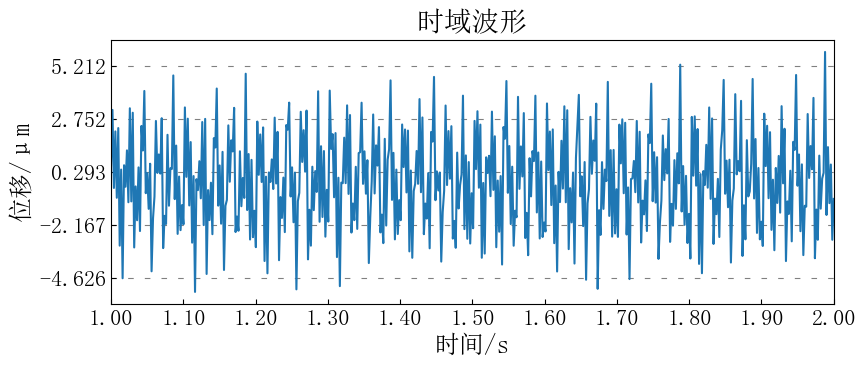

In [4]:
# --------------------------------------------------------------------------------------------#
# 测试接口
from PySP.Signal import Resample

# --------------------------------------------------------------------------------------------#
# 辅助接口
from PySP.Signal import t_Axis,Signal

# --------------------------------------------------------------------------------------------#
# 测试过程
Sig= Signal(axis=t_Axis(len(Data), fs=fs), data=Data, name="位移", unit="μm", label="测试信号")
_Sig= Resample(Sig,type='extreme', dt=Sig.dt*2, t0=1.0, T=1.0)
print(_Sig)
_Sig.plot()

### 1.3 Signal.Periodic()

Signal[仿真含噪准周期信号](=[0.96008167 1.54566685 1.22268155 ... 0.44178459 1.26692017 3.31027312], t_Axis(时间=[0.000e+00 1.000e-03 2.000e-03 ... 1.997e+00 1.998e+00 1.999e+00]s))


f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Plot_Module\LinePlot.py:134: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


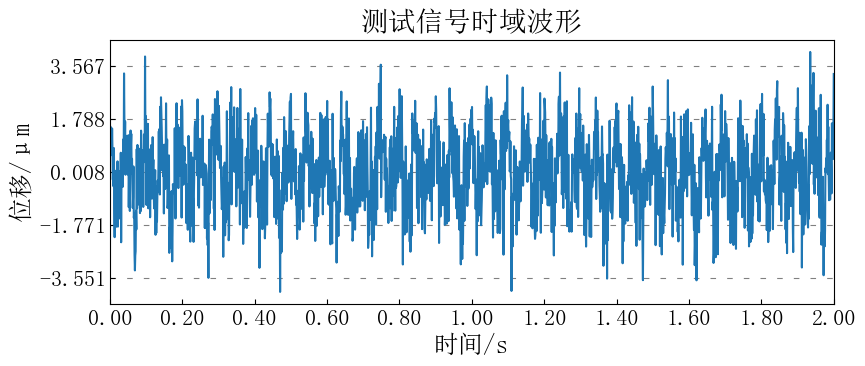

In [8]:
# --------------------------------------------------------------------------------------------#
# 测试接口
from PySP.Signal import Periodic

# --------------------------------------------------------------------------------------------#
# 辅助接口

# --------------------------------------------------------------------------------------------#
# 测试过程
Sig = Periodic(fs=1000.0, T=2.0, CosParams=((20, 1, 32), (50, 0.5, 0)), noise=1.0)
print(repr(Sig))
Sig.name, Sig.unit, Sig.label = '位移', 'μm', '测试信号'
Sig.plot()

## 2. Plot模块测试

### 2.1 Plot.Plot()

f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Plot_Module\core.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.figure.show()


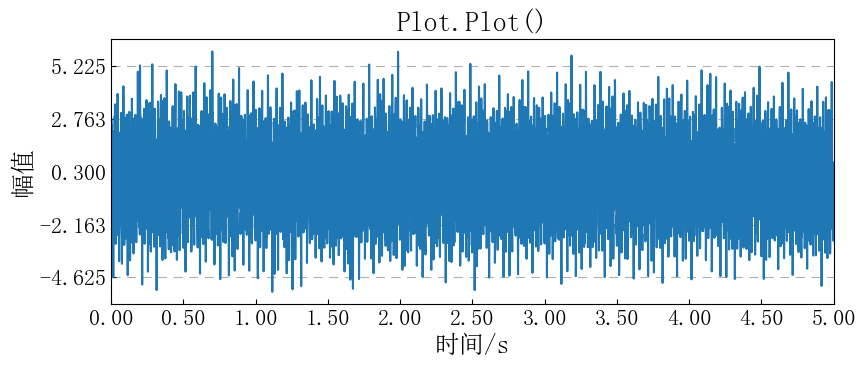

In [10]:
from PySP.Plot import Plot
from PySP.Signal import Signal,t_Axis

try:
    S = Signal(axis=t_Axis(len(Data),fs=fs),data=Data,name="位移",unit="um",label="测试信号")

    class TestPlot(Plot):

        def plot(self, Sig: 'Signal', **kwargs):

            def _draw_plot(ax, data):
                ax.plot(data.__axis__(), data.data, label=data.label)

            task_kwargs = self.kwargs
            task_kwargs.update(kwargs)

            task = {
                "data": Sig,
                "kwargs": task_kwargs,
                "plot_function": _draw_plot,
                "plugins": [], 
            }
            self.tasks.append(task)
            return self
            
    test=TestPlot(
        xlabel="时间/s",
        ylabel="幅值",
        title="Plot.Plot()",
    ).plot(S).show()
except Exception as e:
    print(e)


### 2.2 Plot.LinePlot()

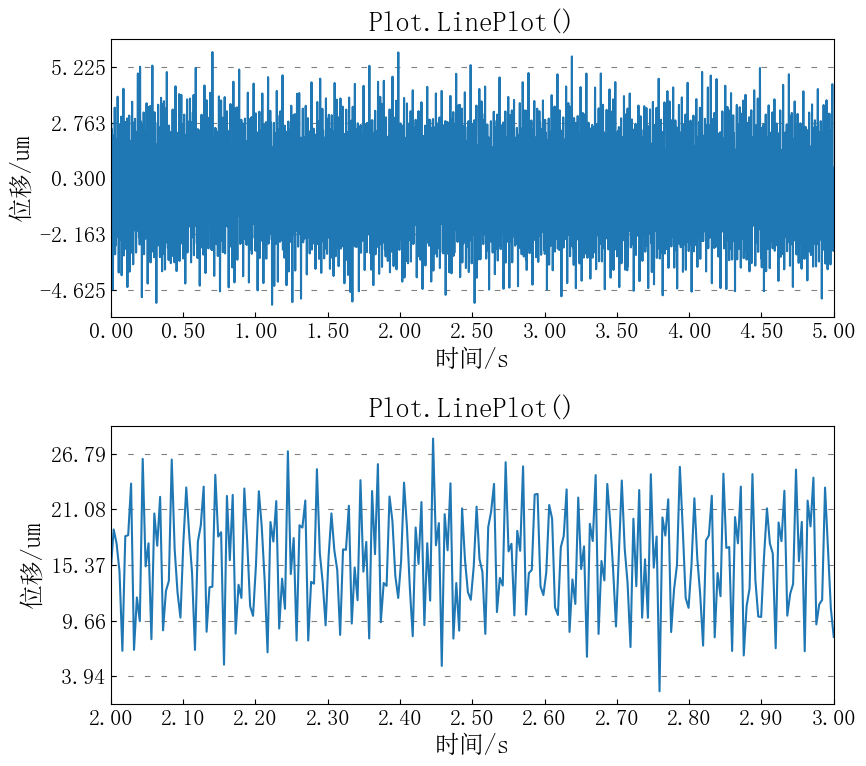

In [11]:
from PySP.Plot import LinePlot

from PySP.Signal import Signal
from PySP.Signal import Resample
import matplotlib.pyplot as plt

try:
    Sig1 = Signal(
        axis=t_Axis(len(Data), fs=fs),
        data=Data,
        name="位移",
        unit="um",
        label="测试信号1",
    )
    Sig2 = (Sig1 + 2) * 3 + 10
    Sig2.label = "测试信号2"
    Sig2 = Resample(Sig=Sig2, dt=Sig.dt*4, t0=2.0, T=1.0)
    Plot = LinePlot(isSampled=True, title="Plot.LinePlot()")
    Plot.TimeWaveform(Sig1,ybins=7)
    Plot.TimeWaveform(Sig2)
    Plot.show(pattern='return')
    plt.show()
except Exception as e:
    print(e)

### 2.3 Plot.PeakfinderPlugin()

f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Plot_Module\core.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.figure.show()


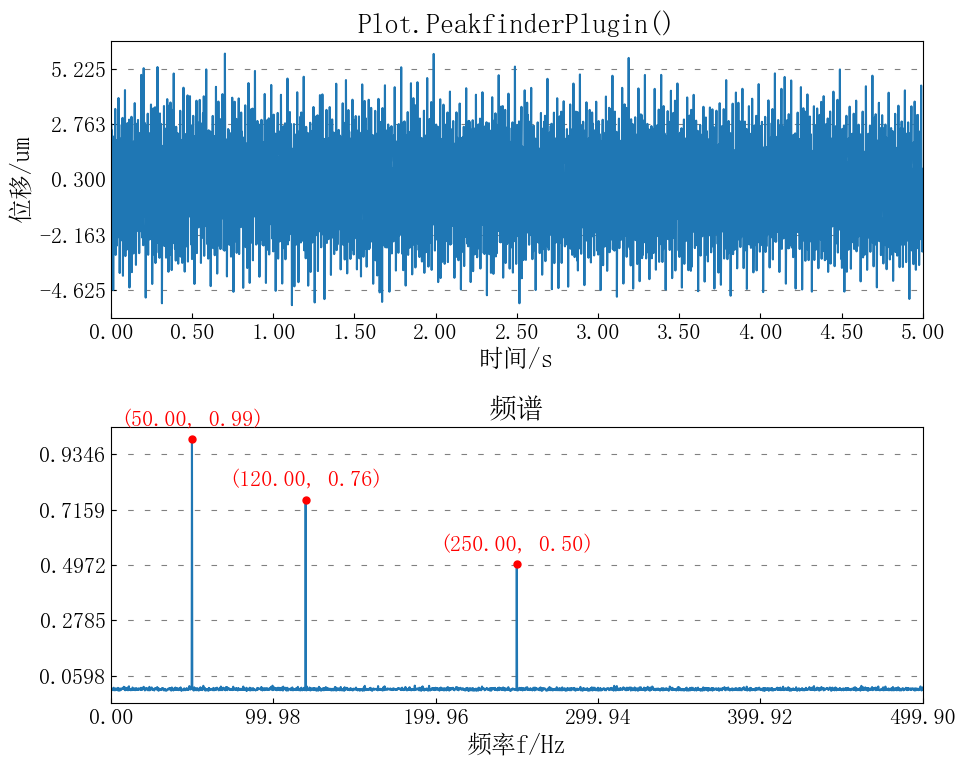

In [13]:
from PySP.Plot import PeakfinderPlugin

from PySP.Signal import Signal
from scipy.fftpack import fft

try:
    Sig1 = Signal(
        axis=t_Axis(len(Data), fs=fs),
        data=Data,
        name="位移",
        unit="um",
        label="测试信号",
    )
    Plot = LinePlot(isSampled=True, figsize=(10, 4), title="Plot.PeakfinderPlugin()")
    Plot.TimeWaveform(Sig1)
    F_x=np.abs(fft(Sig1.data))/Sig1.N
    Plot.Spectrum(Sig1.f_axis,F_x)
    Plot.set_params_to_task(xlabel="频率f/Hz",xlim=(0,500),title="频谱")
    Plot.add_plugin_to_task(PeakfinderPlugin(distance=50,prominence=0.1))
    Plot.show()
except Exception as e:
    print(e)

## 3. Analysis模块测试

### 3.1 Analysis.Analysis()

f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Plot_Module\LinePlot.py:152: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Plot_Module\LinePlot.py:134: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


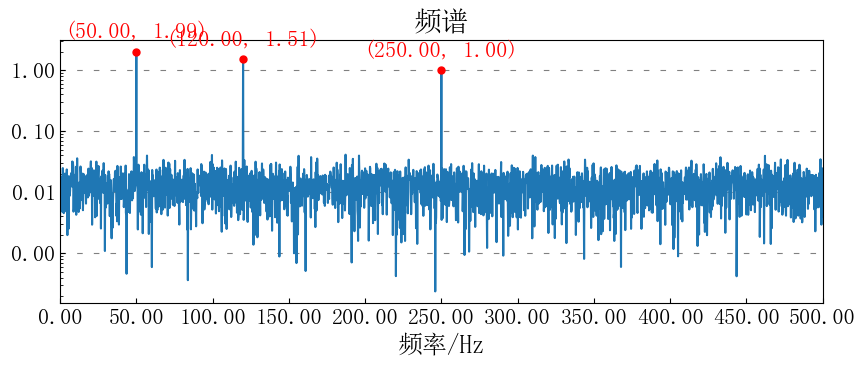

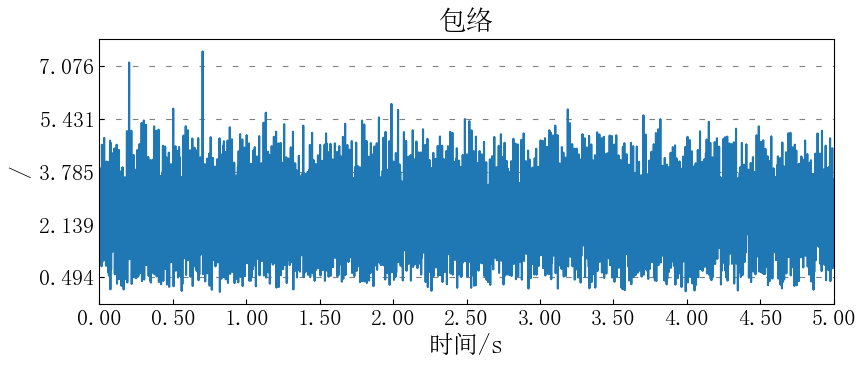

In [18]:
from PySP.Analysis import Analysis

from PySP.Signal import f_Axis,Signal
from PySP.Plot import TimeWaveformFunc, FreqSpectrumFunc
from scipy.signal import hilbert
try:
    class TestAnalysis(Analysis):
        @Analysis.Plot(TimeWaveformFunc)
        def envelope(self):
            """包络分析"""
            analytic_signal = hilbert(self.Sig.data)
            amplitude_envelope = np.abs(analytic_signal)
            return Signal(axis=t_Axis(len(amplitude_envelope),fs=self.Sig.fs,t0=self.Sig.t0),data=amplitude_envelope, label="包络信号")

        @Analysis.Plot(FreqSpectrumFunc)
        def fft(self):
            """FFT频谱分析"""
            N = self.Sig.N
            Y = np.fft.fft(self.Sig.data)
            P2 = np.abs(Y / N)  # 双边频谱
            P1 = P2[: N // 2 + 1]  # 单边频谱
            P1[1:-1] = 2 * P1[1:-1]
            f = self.Sig.fs * np.arange(0, (N / 2 + 1)) / N
            f= f_Axis(len(P1),df=self.Sig.df)
            return f, P1

    S = Signal(
        axis=t_Axis(len(Data), fs=fs),
        data=Data,
        name="位移",
        unit="um",
        label="测试信号",
    )
    analysis=TestAnalysis(
        S,
        isPlot=True,
        title="频谱",
    )
    analysis.fft()
    analysis.plot_kwargs['title']="包络"
    analysis.envelope()

except Exception as e:
    print(e)

## 3.SpectrumAnalysis模块测试

### 3.1 SpectrumAnalysis.window()

Signal[汉宁窗](=[0. 0. 0. ... 0. 0. 0.], t_Axis(时间=[0.000e+00 1.000e-03 2.000e-03 ... 1.097e+00 1.098e+00 1.099e+00]s))


f:\OneDrive\用户文件\科研学习\代码库\PySP.worktrees\dev\PySP\_Plot_Module\LinePlot.py:134: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


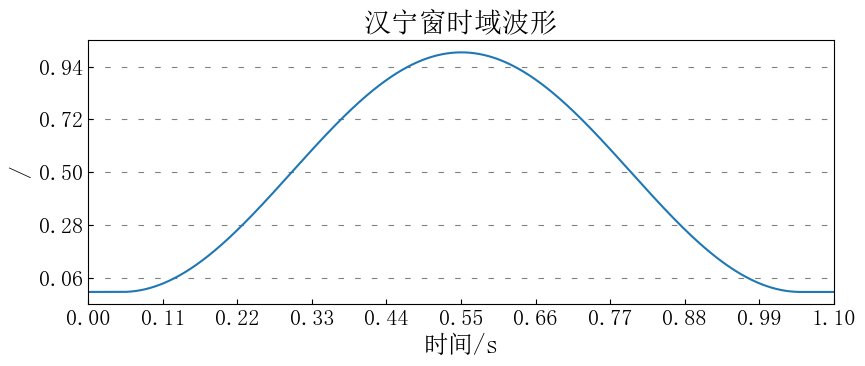

In [20]:
from PySP.Analysis import window

from PySP.Signal import Signal

try:
    data = window(type="汉宁窗", num=1000, padding=50)
    res = Signal(axis=t_Axis(len(data),fs=fs),data=data, label="汉宁窗")
    print(res)
    res.plot()
except Exception as e:
    print(e)

### 3.2 SpectrumAnalysis.SpectrumAnalysis()

In [21]:
from PySP.Analysis import SpectrumAnalysis

from PySP.Signal import Signal

try:
    S = Signal(
        axis=t_Axis(len(Data), fs=fs),
        data=Data,
        name="位移",
        unit="μm",
        label="测试信号",
    )
    analysis=SpectrumAnalysis(
        S,
        isPlot=True,
        title="频谱",
    )
    analysis.cft()
    analysis.plot_kwargs['title']="包络谱"
    analysis.enve_spectra()
except Exception as e:
    print(e)

'Signal' object has no attribute 'f_Axis'
